<a href="https://colab.research.google.com/github/srujannayak32/MLLAB189/blob/main/ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

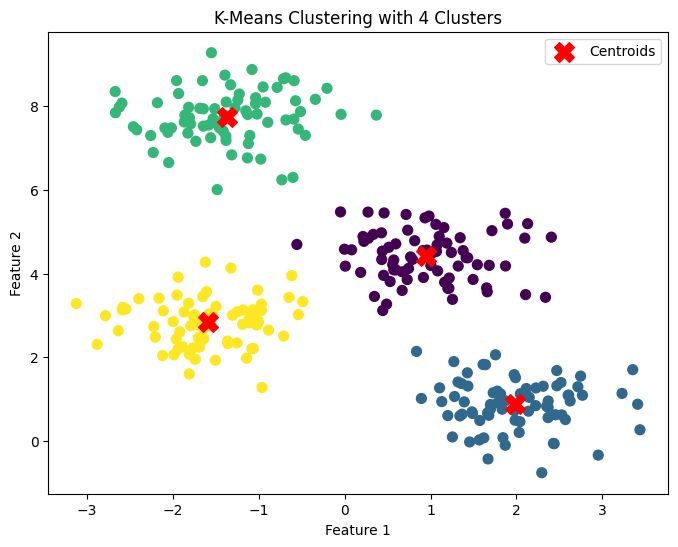

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
def euclidean_distance(p1,p2):
  return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

point1 = [1, 2, 3]
point2 = [4, 5, 6]
print(f"Euclidean distance: {euclidean_distance(point1, point2)}")

Euclidean distance: 5.196152422706632


In [ ]:
import numpy as np

def manhattan_distance(p1, p2):

    return np.sum(np.abs(np.array(p1) - np.array(p2)))

point1 = [9, 3, 5]
point2 = [1, 8, 4]
print(f"Manhattan distance: {manhattan_distance(point1, point2)}")

Manhattan distance: 14


In [ ]:
import numpy as np

def cosine_similarity(p1, p2):
    dot_product = np.dot(p1, p2)
    norm_p1 = np.linalg.norm(p1)
    norm_p2 = np.linalg.norm(p2)
    return dot_product / (norm_p1 * norm_p2)

point1 = [1, 2, 3]
point2 = [4, 5, 6]
print(f"Cosine similarity: {cosine_similarity(point1, point2)}")

Cosine similarity: 0.9746318461970762


In [ ]:
import numpy as np

def minkowski_distance(p1, p2, p):
    return np.sum(np.abs(np.array(p1) - np.array(p2))**p)**(1/p)

point1 = [1, 2, 3]
point2 = [4, 5, 6]
print(f"Minkowski (p=1): {minkowski_distance(point1, point2, p=1)}")
print(f"Minkowski (p=2): {minkowski_distance(point1, point2, p=2)}")

Minkowski (p=1): 9.0
Minkowski (p=2): 5.196152422706632


In [ ]:
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    if union == 0:
        return 0.0

    return intersection / union

set1 = {'apple', 'banana', 'cherry'}
set2 = {'apple', 'orange', 'grape'}
print(f"Jaccard index: {jaccard_index(set1, set2)}")

set3 = {'A', 'B', 'C', 'D'}
set4 = {'A', 'C', 'E', 'F'}
print(f"Jaccard index: {jaccard_index(set3, set4)}")

Jaccard index: 0.2
Jaccard index: 0.3333333333333333


HIERARCHIAL CLUSTERING

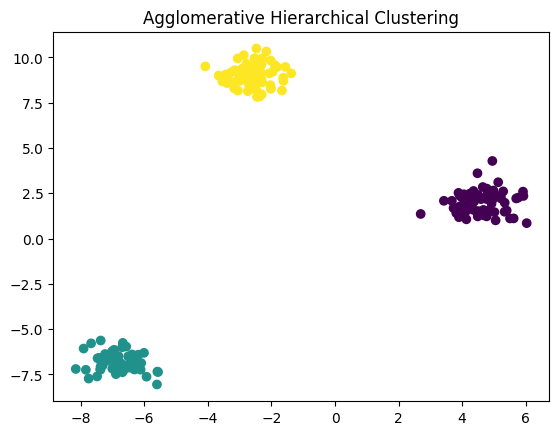

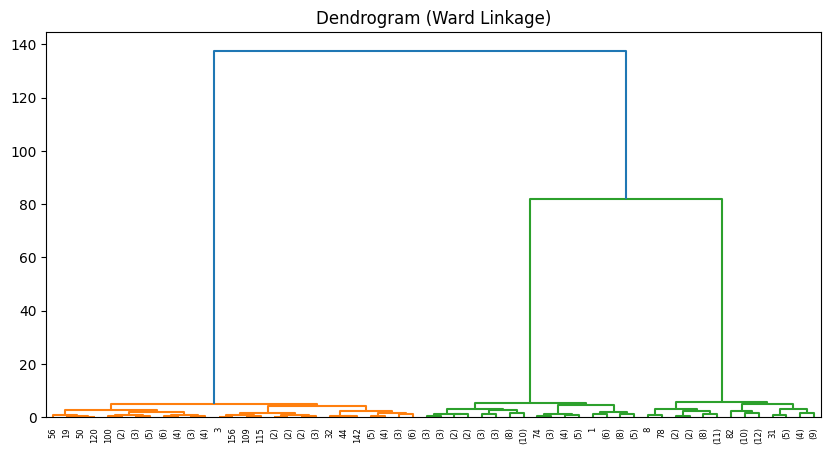

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)


agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)


plt.scatter(X[:,0], X[:,1], c=labels_agg, cmap="viridis")
plt.title("Agglomerative Hierarchical Clustering")
plt.show()


linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Ward Linkage)")
plt.show()

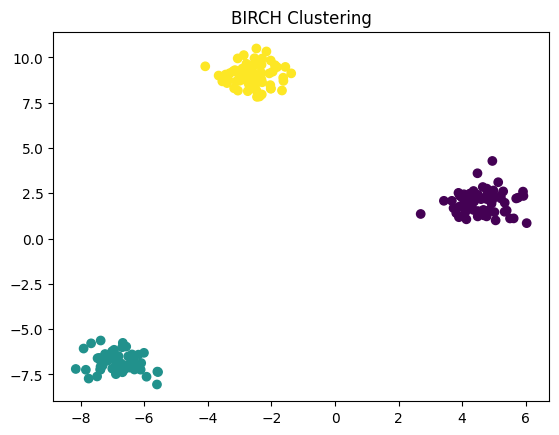

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

# Generate dataset
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)

# Apply BIRCH
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X)

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=labels_birch, cmap="viridis")
plt.title("BIRCH Clustering")
plt.show()

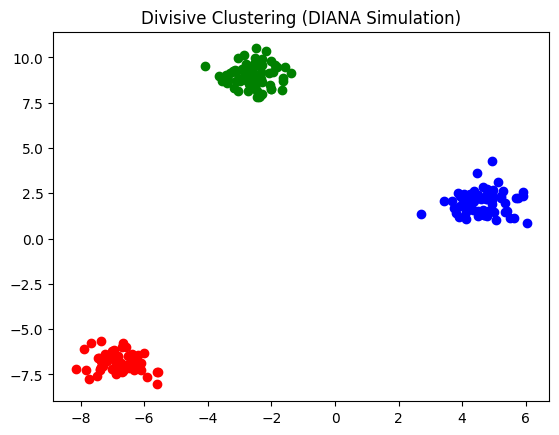

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate dataset
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)

# Function: Divisive Clustering (DIANA Simulation using KMeans splits)
def divisive_clustering(X, k=3):
    clusters = [X]   # start with all data as one cluster

    while len(clusters) < k:
        # Pick the largest cluster to split
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)

        # Split into 2 using KMeans
        km = KMeans(n_clusters=2, random_state=42).fit(largest_cluster)
        y = km.labels_

        # Create new clusters
        clusters.append(largest_cluster[y==0])
        clusters.append(largest_cluster[y==1])

    return clusters

# Run DIANA simulation
clusters = divisive_clustering(X, k=3)

# Plot results
colors = ['red', 'green', 'blue']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:,0], cluster[:,1], color=colors[i])
plt.title("Divisive Clustering (DIANA Simulation)")
plt.show()